In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**regression**

  * build a machine learning to predict a continous value which is numerical in nature

In [ ]:
salary_data = pd.DataFrame({
    "yoe":[4, 6 , 3, 8, 9, 7],
    "salary":[10, 14 , 8 , 14, 17, 11]
})

In [ ]:
salary_data

,yoe,salary
0,4,10
1,6,14
2,3,8
3,8,14
4,9,17
5,7,11


**Using linear regression we find out slope and intercept of best fit line for a given data or for a pair of features and labels**

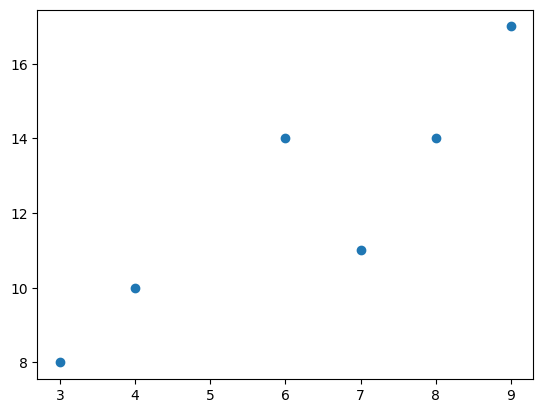

In [ ]:
plt.scatter(salary_data['yoe'] , salary_data['salary'])
plt.show()

In [ ]:
#y = w0 + w1*x

x = salary_data['yoe']
y = salary_data['salary']

n1 = ((x - x.mean())*(y - y.mean())).sum()
d1 = ((x - x.mean())**2).sum()

w1 = n1/d1
print(w1)

w0 = y.mean() - w1 * x.mean()
print(w0)

1.2546583850931674
4.596273291925468


**Trained Parameters**

  * **w0 is intercept of best fit line**
  * **w1 is the slope of the best fit linear line on given data**

In [ ]:
yh = w0 + w1 * x

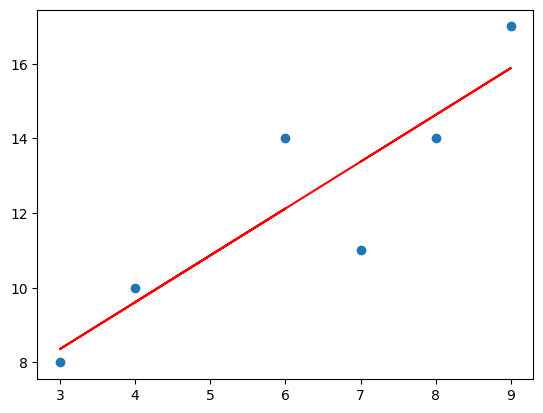

In [ ]:
plt.scatter(x, y)

plt.plot(x,yh,'r')

plt.show()

In [ ]:
yoe = 5.5
predicted_salary = w0 + w1 * yoe
print(predicted_salary)

11.496894409937887


**Simple linear regression using Scikit-learn library**

In [ ]:
x = salary_data[['yoe']]
y = salary_data['salary']

from sklearn.linear_model import LinearRegression         #import the library required to build a linear regression model

modelA = LinearRegression()                              #Define a model to be trained

modelA.fit(x,y)                                         #fit the the feature and label into the model so that algorithm can do required calculations


LinearRegression()

In [ ]:
#tarined parameters
print(modelA.coef_)
print(modelA.intercept_)

[1.25465839]
4.596273291925465


In [ ]:
#yh = w0 + w1*x
yh = modelA.intercept_ + modelA.coef_ * x

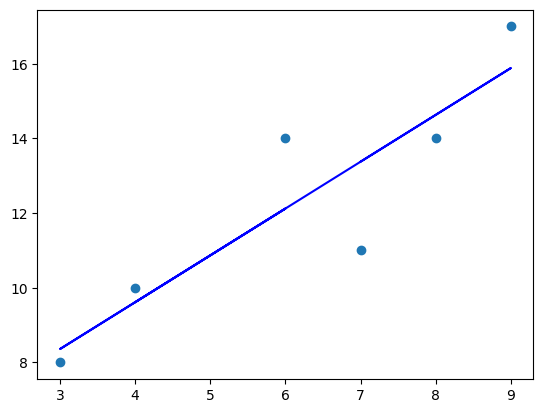

In [ ]:
plt.scatter(x, y)

plt.plot(x,yh,'b')

plt.show()

In [ ]:
yoe = 6.5

print(modelA.predict([[yoe]]))

print(modelA.intercept_ + modelA.coef_ * yoe)

[12.7515528]
[12.7515528]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Advertising Data**

**Build predictive model to predict the sales value**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Advertising.csv',
                 index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [ ]:
X = df[['TV']]
y = df['sales']

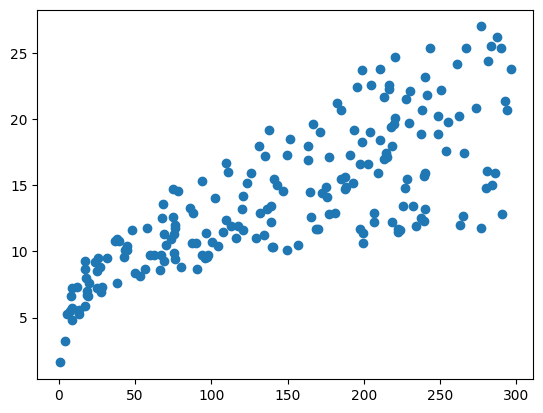

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
modelB = LinearRegression()
modelB.fit(X,y)

LinearRegression()

In [ ]:
print(modelB.coef_)
print(modelB.intercept_)

[0.04753664]
7.032593549127695


In [ ]:
#Calculated or predicted sales on given features in the data using coefficients in intercept identified by linear regression algorithm
#yh = modelB.intercept_ + modelB.coef_ * X
#yh

yh_b = modelB.predict(X)

In [ ]:
#real_sales - predicted or calculated sales by modelB => error

mae_modelB = abs(y - yh_b).mean()
print(mae_modelB)

2.549806038927486


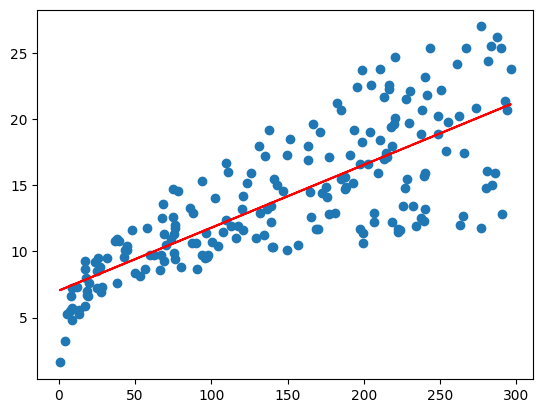

In [ ]:
plt.scatter(X,y)
plt.plot(X,yh,'r')
plt.show()

In [ ]:
tv_expenses = 56.5
sales_predicted = modelB.predict([[tv_expenses]])
print(sales_predicted)

[9.71841373]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Multiple linear regression**

  * if we have multiple independent variables or features to predict a single value

In [ ]:
X = df[['TV', 'radio']]
y = df['sales']

In [ ]:
from sklearn.linear_model import LinearRegression
modelC = LinearRegression()
modelC.fit(X,y)

LinearRegression()

In [ ]:
print(modelC.coef_)
print(modelC.intercept_)

[0.04575482 0.18799423]
2.9210999124051362


In [ ]:
#yh = w0 + w1X1 + w2X2

#yh = modelC.intercept_ + modelC.coef_[0] * X.TV +  modelC.coef_[1] * X.radio
yh_modelC = modelC.predict(X)
yh_modelC

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [ ]:
mae_modelC = abs(y - yh_modelC).mean()
print(mae_modelC)

1.2537471644234008


**Conclusion**

  * when we use single feature to train a regression model the mean absolute error was 2.54
  * when we use two features to train a regression model the mean absolute error was 1.25
  * So, In this case multiple linear regression functions better compared to simple linear regression to predict a value

In [ ]:
#Build a regression model and evaluate the performance metrics mean absolute error using all three features.

X = df[['TV', 'radio' , 'newspaper']]
y = df['sales']